In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.base import clone
 

In [2]:
data = pd.read_csv('./data/cleaned-tokenized-train-tweets.csv', sep="|")
data.sample(5)

,id,keyword,location,text,target,tokenized_clean_text
9972,9972,collapsed,"Eugene, Oregon",Roof collapsed a bowling alley many in the com...,1,"['roof', 'collapsed', 'bowling', 'alley', 'man..."
2342,2342,demolition,NaN,#download &amp; #watch Demolition Frog (2002) ...,1,"['download', 'amp', 'watch', 'demolition', 'fr..."
12804,12804,fatalities,NaN,No UK train accident fatalities for 8th year r...,1,"['uk', 'train', 'accident', 'fatality', 'year'..."
9649,9649,casualties,"Arizona, USA",Obama 'lambasted 4 not being respected &amp; 4...,0,"['obama', 'respected', 'amp', 'would', 'trump'..."
15851,15851,rioting,NYC,.@runjewels recently met with the @BBC to disc...,0,"['runjewels', 'recently', 'met', 'bbc', 'discu..."


In [3]:
train, test = train_test_split(data, test_size=0.3, random_state=30255)
display(train.sample(5))
display(test.sample(5))

,id,keyword,location,text,target,tokenized_clean_text
10139,10139,collision,"East Atlanta, Georgia",Well Saturn doesn't exist anymore. So the coll...,1,"['well', 'saturn', 'exist', 'anymore', 'collis..."
13102,13102,flames,Fairy Tail!,@AisuMage @AkumaReisu --just between Gray and ...,1,"['aisumage', 'akumareisu', 'gray', 'ophelia', ..."
17542,17542,trouble,North Carolina,@TJ_Robertson2 no bc we always got in trouble ...,0,"['bc', 'always', 'got', 'trouble', 'laughing',..."
13773,13773,hijack,Kolkata,Stay cautious. http://t.co/JeJC9XcTMp,0,"['stay', 'cautious', 'http']"
2062,2062,dead,NaN,i miss my longer hair..but it was so dead anyw...,0,"['miss', 'longer', 'hair', 'dead', 'anyways', ..."


,id,keyword,location,text,target,tokenized_clean_text
9926,9926,collapse,Location,I get this feeling that society will collapse ...,0,"['get', 'feeling', 'society', 'collapse', 'imp..."
8437,8437,battle,USA!,I liked a @YouTube video from @screwattack htt...,1,"['liked', 'youtube', 'video', 'screwattack', '..."
7403,7403,wounded,"Paterson, New Jersey",Officer Wounded Suspect Killed in Exchange of ...,1,"['officer', 'wounded', 'suspect', 'killed', 'e..."
17001,17001,survivors,"Chicago, IL",RT @kotowsa: South Sudan‰Ûªs war on women: sur...,1,"['rt', 'kotowsa', 'south', 'war', 'woman', 'su..."
15066,15066,obliteration,828/704(Soufside)/while looking goofy in NJ,Back in 02 to 03 would never said that 50 woul...,0,"['back', 'would', 'never', 'said', 'would', 'e..."


In [4]:
# TF-IDF
tfidf_vec = TfidfVectorizer(ngram_range=(1,3))
tfidf_vec.fit(data['tokenized_clean_text'].tolist())
# tfidf_test = clone(tfidf_train)
train_tfidf_text = tfidf_vec.transform(train['tokenized_clean_text'].tolist())
test_tfidf_text = tfidf_vec.transform(test['tokenized_clean_text'].tolist())


In [5]:
model = LogisticRegression()
model.fit(train_tfidf_text, train['target'])


LogisticRegression()

In [6]:
train_prediction = model.predict(train_tfidf_text)
print(classification_report(train['target'], train_prediction))


              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7388
           1       0.98      0.87      0.92      5543

    accuracy                           0.94     12931
   macro avg       0.94      0.93      0.93     12931
weighted avg       0.94      0.94      0.93     12931



In [7]:
test_predict = model.predict(test_tfidf_text)
print(classification_report(test['target'], test_predict))


              precision    recall  f1-score   support

           0       0.81      0.97      0.88      3141
           1       0.94      0.70      0.81      2401

    accuracy                           0.85      5542
   macro avg       0.88      0.83      0.84      5542
weighted avg       0.87      0.85      0.85      5542



In [10]:
cm = confusion_matrix(test['target'], test_predict)
cm

array([[3041,  100],
       [ 716, 1685]])

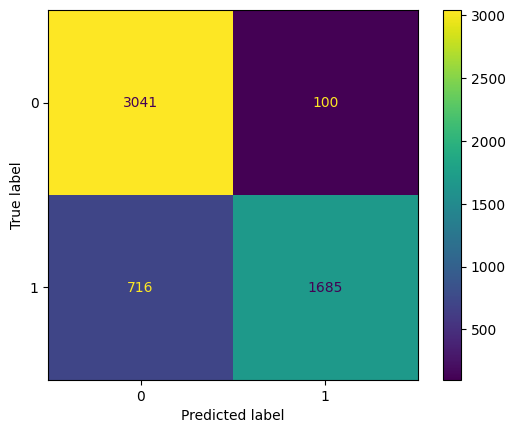

In [12]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()